In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np 
import seaborn as sns

sns.set_context("notebook", rc={"lines.linewidth": 3})
##################################################
plt.style.use('tableau-colorblind10')
##################################################

In [26]:
cate="primaryNivo"
dfep = pd.read_csv(f"../leave_one_out/Expression_log2_21_{cate}_braun_2020.csv")
dfep

,gene_name,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2ML1-AS1,A2MP1,A3GALT2,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,30.187983,22.999432,33.643965,37.130851,22.705126,22.869853,21.076515,21.271282,21.807184,...,33.26816,30.04056,30.36292,30.98129,32.38442,28.01561,31.24379,33.81903,33.22469,31.23383
1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,30.483638,25.581769,28.866645,37.945043,27.797609,24.142100,21.076515,21.271282,21.807184,...,31.53633,29.94062,30.80829,30.74475,32.09470,26.32526,32.70057,33.67262,33.10198,32.44643
2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,30.092851,26.933385,26.684228,36.851946,22.705126,30.406352,21.076515,21.271282,21.807184,...,30.74474,31.95812,30.73898,30.15898,31.69473,26.33098,32.68330,33.96047,32.97135,32.20607
3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,30.975010,26.683128,32.521494,38.453517,26.337846,28.229357,21.076515,21.271282,26.484608,...,31.63196,30.71732,31.09654,30.25757,31.90774,27.53819,32.64194,34.54254,33.24885,32.78278
4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,26.915750,22.999432,23.219176,38.931987,22.705126,22.869853,21.076515,21.271282,21.807184,...,31.75620,30.75149,30.55896,30.17101,31.01545,21.45312,32.86620,34.24375,34.86720,32.73361
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
128,P66507-04D-Run1_S3_L001,29.718678,21.286965,33.059162,35.566022,21.357557,27.686244,20.980667,25.034267,21.018133,...,28.60179,30.27215,31.08287,31.21266,33.18573,29.26041,31.70839,32.97611,34.23396,32.87393
129,P66507-07G-Run1_S17_L002,31.147910,21.286965,31.617351,37.423994,21.357557,27.720569,20.980667,20.992693,28.011280,...,26.14211,31.31652,31.24066,31.34713,33.06662,27.08693,30.62278,35.10264,33.68084,30.73622
130,P66425-03B-Run1_S10_L001,30.099518,25.040893,33.891608,38.289830,21.357557,26.870362,20.980667,20.992693,21.018133,...,32.54706,29.97152,31.22229,30.38211,31.30604,27.29504,32.44263,34.20699,32.80918,32.29759
131,EA639069,30.387408,26.682436,32.143470,37.884154,25.812937,24.505338,20.976688,23.119773,20.107134,...,30.80333,29.50693,31.54214,31.60875,32.22266,27.29750,32.23249,34.29977,33.79696,32.28268


In [27]:
dfcl = pd.read_csv("../leave_one_out/braun_data_clinical_data.csv")

In [28]:
dfcl

,RNA_ID,Cohort,Arm,Sex,Age,MSKCC,Tumor_Sample_Primary_or_Metastasis,ORR,Benefit,OS,OS_CNSR,PFS,PFS_CNSR
0,G138701_RCCBMS-00020-T_v1_RNA_OnPrem,CM-010,NIVOLUMAB,Male,62.0,FAVORABLE,PRIMARY,SD,CB,25.347945,1,12.164384,1
1,G138701_RCCBMS-00097-T_v1_RNA_OnPrem,CM-010,NIVOLUMAB,Female,67.0,FAVORABLE,PRIMARY,PR,CB,36.526027,1,5.490411,1
2,G138701_RCCBMS-00141-T_v1_RNA_OnPrem,CM-010,NIVOLUMAB,Female,62.0,POOR,PRIMARY,PR,CB,68.547945,0,61.906849,0
3,G138701_RCCBMS-00099-T_v1_RNA_OnPrem,CM-010,NIVOLUMAB,Male,60.0,FAVORABLE,PRIMARY,PD,NCB,1.479452,1,1.249315,1
4,G138701_RCCBMS-00163-T_v1_RNA_OnPrem,CM-010,NIVOLUMAB,Male,76.0,INTERMEDIATE,PRIMARY,SD,ICB,63.978082,0,5.654795,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
306,RCC_73_T_SCR,CM-009,NIVOLUMAB,MALE,77.0,NaN,METASTASIS,PD,NCB,5.852055,1,1.906849,1
307,RCC_90_T_SCR,CM-009,NIVOLUMAB,MALE,54.0,NaN,METASTASIS,PD,NCB,16.405479,1,1.183562,1
308,RCC_93_T_SCR,CM-009,NIVOLUMAB,MALE,64.0,NaN,METASTASIS,PR,CB,22.487671,1,16.438356,1
309,RCC_96_T_SCR,CM-009,NIVOLUMAB,FEMALE,75.0,NaN,METASTASIS,PD,NCB,19.134247,0,1.216438,1


In [29]:
wei = pd.read_csv("../leave_one_out/primaryNivo.weight.txt",sep="\t",header=None)
wei

,0,1
0,EA595500,0.669444
1,EA595522,0.717720
2,EA595529,0.541289
3,EA595624,0.686586
4,EA595635,0.617768
...,...,...
128,P66511-01E-Run1_S17_L002,0.707179
129,P66511-05E-Run1_S11_L001,0.625526
130,P66511-06G-Run1_S16_L001,0.620694
131,P66511-07H-Run1_S19_L002,0.693960


In [30]:
dfmerge = pd.merge(dfep,dfcl,how="left",left_on="gene_name",right_on="RNA_ID")
dfmerge = pd.merge(dfmerge,wei,how="left",left_on="gene_name",right_on=0)
#dfmerge

path_list = []
with open("../pathway/pathway_gene_sets/h.all.v2023.1.Hs.symbols.gmt") as gmt:
    for i in gmt:
        path_list.append([i.split()[0]] + i.split()[2:])

for i in path_list:
    dfmerge[i[1:]]
    break

In [ ]:
df_cox_pfs = pd.read_csv(f"./cox_result/cox_result_{cate}_pfs.txt",index_col=0)
p = df_cox_pfs[df_cox_pfs["p"]<0.01].index

df_cox_os = pd.read_csv(f"./cox_result/cox_result_{cate}_os.txt",index_col=0)
o = df_cox_os[df_cox_os["p"]<0.01].index

inter = set(p).intersection(o)
print(len(inter))
temp = []
for i in inter:
    temp.append(i.split("_")[0])
    temp.append(i.split("_")[1])
for i in set(temp):
    #if i == "E2F1":
    print(i)

In [ ]:
set(p).intersection(o)

In [33]:
# enriched transcription factor top 10
"""
MZF1 10.21037/tcr-21-1953 
ZNF692 10.1016/j.bbrc.2023.06.014 
ZNF76
CXXC1 https://doi.org/10.1016/j.gene.2018.06.063
ZNF316
RBCK1 https://www.nature.com/articles/s41388-023-02613-w
PRR12
SCX
MBD6
ZNF783
"""

'\nMZF1 10.21037/tcr-21-1953 \nZNF692 10.1016/j.bbrc.2023.06.014 \nZNF76\nCXXC1 https://doi.org/10.1016/j.gene.2018.06.063\nZNF316\nRBCK1 https://www.nature.com/articles/s41388-023-02613-w\nPRR12\nSCX\nMBD6\nZNF783\n'

In [35]:
import scipy
pcc = []
for i in inter:
#for i in ["DISC1_TMEM41B",]:
    bt = i.split("_")
    dfmer = dfmerge[dfmerge["Benefit"]=="CB"].copy()
    #print(scipy.stats.pearsonr(dfmer[bt[0]],dfmer[bt[1]]))
    a = scipy.stats.pearsonr(dfmer[bt[0]],dfmer[bt[1]])[0]
    dfmer = dfmerge[dfmerge["Benefit"]=="ICB"].copy()
    b = scipy.stats.pearsonr(dfmer[bt[0]],dfmer[bt[1]])[0]
    dfmer = dfmerge[dfmerge["Benefit"]=="NCB"].copy()
    #print(scipy.stats.pearsonr(dfmer[bt[0]],dfmer[bt[1]]))
    c = scipy.stats.pearsonr(dfmer[bt[0]],dfmer[bt[1]])[0]
    pcc.append( [i,a,b,c])
pcc_df = pd.DataFrame(pcc)

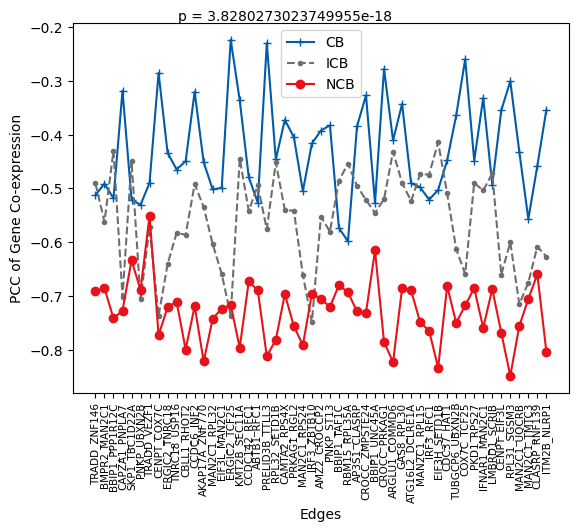

In [43]:
from matplotlib import pyplot as plt
import scienceplots
import seaborn as sns

plt.rcParams.update(plt.rcParamsDefault)
%matplotlib inline
plt.style.use('default')


pcc_df.columns= ["edges","CB","ICB","NCB"]
ax = pcc_df.set_index("edges").plot.line(color={"ICB":"#6d6e71","NCB":"#E7131A","CB":"#005baa"},style=['+-','.--','o-'])
plt.xticks(rotation=90) 
plt.ylabel("PCC of Gene Co-expression")
plt.xlabel("Edges")
## need to change
plt.text(21,-0.18, f"p = {temp}", horizontalalignment='center',verticalalignment='center')
#ax.set(xticks=pcc_df["edges"].tolist())
plt.xticks([i for i in range(len(pcc_df["edges"].tolist()))],pcc_df["edges"].tolist(),fontsize=7.5)
plt.savefig(f"f4.{cate}_edge_cb_ncb.tif",dpi=600,bbox_inches='tight')

In [40]:
import scipy
from scipy.stats import ranksums
print(scipy.stats.ttest_ind(pcc_df["CB"],pcc_df["NCB"],\
                            equal_var=[scipy.stats.levene(pcc_df["CB"],pcc_df["NCB"])[1] > 0.05]))
temp = ranksums(pcc_df["CB"],pcc_df["NCB"], alternative='two-sided').pvalue 
ranksums(pcc_df["CB"],pcc_df["NCB"], alternative='two-sided').pvalue 

TtestResult(statistic=19.723218210351995, pvalue=3.046250097661137e-36, df=100.0)


3.8280273023749955e-18

(array([-10.,   0.,  10.,  20.,  30.,  40.,  50.,  60.]),
 [Text(-10.0, 0, 'CROCC_ZMPSTE24'),
  Text(0.0, 0, 'KMT2B_SEC11A'),
  Text(10.0, 0, 'ITM2B_NLRP1'),
  Text(20.0, 0, 'TNRC18_USP16'),
  Text(30.0, 0, 'EIF3L_MAN2C1'),
  Text(40.0, 0, 'GAS8_RPL30'),
  Text(50.0, 0, 'CENPT_COX7C'),
  Text(60.0, 0, '')])

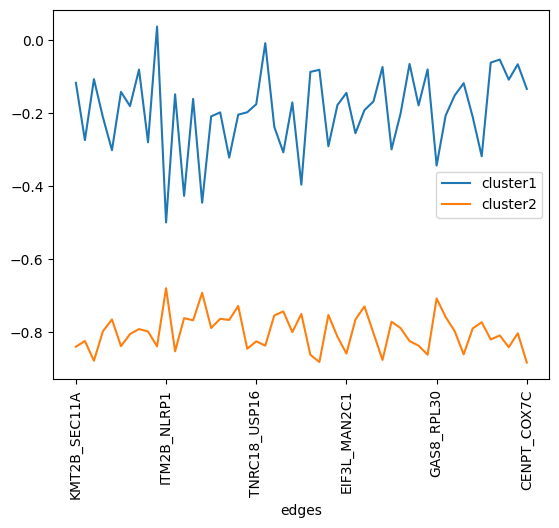

In [12]:
dfmerge
df_label = pd.read_csv("pN_cluster_labels.txt")
dflabelmerge = pd.merge(dfmerge,df_label,how="left",left_on="gene_name",right_on="A_B")
import scipy
pcc = []
for i in inter:
#for i in ["DISC1_TMEM41B",]:
    bt = i.split("_")
    dfmer = dflabelmerge[dflabelmerge["cres"]==1].copy()
    a = scipy.stats.pearsonr(dfmer[bt[0]],dfmer[bt[1]])[0]
    dfmer = dflabelmerge[dflabelmerge["cres"]==2].copy()
    b = scipy.stats.pearsonr(dfmer[bt[0]],dfmer[bt[1]])[0]

    pcc.append( [i,a,b])
pcc_df = pd.DataFrame(pcc)

from matplotlib import pyplot as plt
pcc_df.columns= ["edges","cluster1","cluster2"]
pcc_df.set_index("edges").plot.line()
plt.xticks(rotation=90) 

Text(0.5, 1.0, 'Gene expression pattern between two clusters')

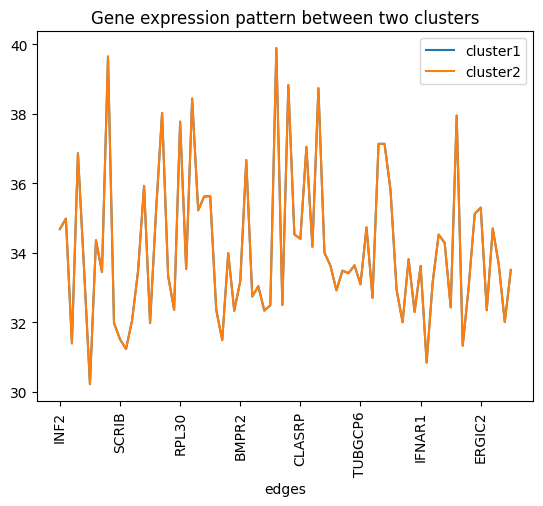

In [14]:
# gene expression 
dfmerge
df_label = pd.read_csv("pN_cluster_labels.txt")
dflabelmerge = pd.merge(dfmerge,df_label,how="left",left_on="gene_name",right_on="A_B")
import scipy
pcc = []
count = 0
for i in set(temp):
#for i in ["DISC1_TMEM41B",]:
    dfmer = dflabelmerge[dflabelmerge["cres"]==1].copy()
    a = dfmer[i].mean()
    dfmer1 = dflabelmerge[dflabelmerge["cres"]==2].copy()
    b = dfmer[i].mean()
    if scipy.stats.ttest_ind(dfmer[i],dfmer1[i],\
                            equal_var=[scipy.stats.levene(dfmer[i],dfmer1[i])[1] > 0.05])[1] < 0.05:
        count+=1
    pcc.append( [i,a,b])
pcc_df = pd.DataFrame(pcc)

from matplotlib import pyplot as plt
pcc_df.columns= ["edges","cluster1","cluster2"]
pcc_df.set_index("edges").plot.line()
plt.xticks(rotation=90) 
plt.title("Gene expression pattern between two clusters")

In [35]:
count

13

In [60]:
pcc_df.columns = ["edges","CB","ICB","NCB"]
a = pcc_df[((pcc_df["CB"] - pcc_df["NCB"])>0.5) ]["edges"].tolist()
b = pcc_df[((pcc_df["CB"] - pcc_df["NCB"]) < -0.1) ]["edges"].tolist()

In [61]:
pcc_df[pcc_df["edges"].isin(b+a)]

,edges,CB,ICB,NCB
21,PNKP_RSL1D1,-0.254249,-0.602903,-0.827578
55,CROCC_PRKAG1,-0.277407,-0.520067,-0.785807
80,EVI2B_XYLT2,-0.719945,-0.654342,-0.438134
91,PRELID3B_TTLL3,-0.229268,-0.576191,-0.812152
94,LGALS3BP_VPS13A,-0.718267,-0.552364,-0.476941
143,GSDMB_OCIAD1,-0.121616,-0.728289,-0.660423
183,FZR1_RPL30,-0.157491,-0.644511,-0.739643
190,ADGRE5_ARHGAP5,-0.717572,-0.558139,-0.485859
244,EIF3H_MBD1,-0.230169,-0.602231,-0.749061
253,RPL31_SGSM3,-0.300376,-0.600311,-0.848789


import scipy
for i in a:
    bt = i.split("_")
    dfmer1 = dfmerge[dfmerge["Benefit"]=="CB"].copy()
    c1 = scipy.stats.pearsonr(dfmer1[bt[0]],dfmer1[bt[1]])
    print("CB:",c1)
    dfmer2 = dfmerge[dfmerge["Benefit"]=="NCB"].copy()
    c2 = scipy.stats.pearsonr(dfmer2[bt[0]],dfmer2[bt[1]])
    print(c2)

    print(f"{bt[0]}",scipy.stats.ttest_ind(dfmer1[bt[0]],dfmer2[bt[0]],equal_var=[scipy.stats.levene(dfmer1[bt[0]],dfmer2[bt[0]])[1] > 0.05])[1],"------------")
    print(f"{bt[1]}",scipy.stats.ttest_ind(dfmer1[bt[1]],dfmer2[bt[1]],equal_var=[scipy.stats.levene(dfmer1[bt[1]],dfmer2[bt[1]])[1] > 0.05])[1],"------------")

<Axes: ylabel='edges'>

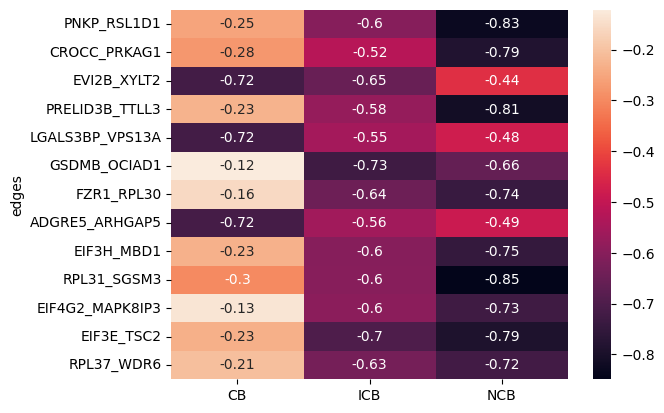

In [62]:
pcc_df.columns = ["edges","CB","ICB","NCB"]
import seaborn as sns

sns.heatmap(pcc_df[pcc_df["edges"].isin(b+a)].set_index("edges"),annot=True)

In [13]:
dfmerge["PNKP_RSL1D1"] = dfmerge["PNKP"]/dfmerge["RSL1D1"]

In [63]:
df_sp = dfmerge[["CROCC","PRKAG1","Benefit"]]

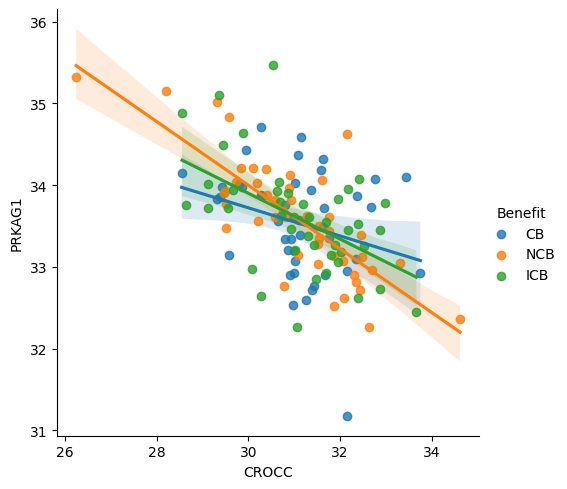

In [70]:
sns.lmplot(x="CROCC", y="PRKAG1", hue="Benefit", data=df_sp);

In [76]:
cb = dfmerge[dfmerge["Benefit"]=="CB"]["PRKAG1"] #["CROCC","PRKAG1"
ncb = dfmerge[dfmerge["Benefit"]=="NCB"]["PRKAG1"]

In [77]:
import scipy
P = scipy.stats.ttest_ind(cb,ncb,\
                            equal_var=[scipy.stats.levene(cb,ncb)[1] > 0.05])[1]
print(P)

0.6621815993655376


In [19]:
from scipy.stats import ranksums
ranksums(cb,ncb)


RanksumsResult(statistic=-0.19372064861961089, pvalue=0.8463946228522725)

In [18]:
import scipy
scipy.stats.pearsonr(dfmerge["PNKP"],dfmerge["RSL1D1"])

PearsonRResult(statistic=-0.5840968168654636, pvalue=1.5833990467249115e-13)